# No-show Appointments Dataset

## This dataset collected information for over 100,000 appointments from medical facilities in Brazil.
### Information within this dataset includes:

**Patient ID** - Unique identifier for each patient

**Appointment ID** - Unique identidier for eacg appointment

**Gender** - Male or Female

**Scheduled Day** - The day the appointment was scheduled

**Appointment Day** - The day of the appointment

**Age** - How old the patient is

**Neighbourhood** - The location of the hospital

**Scholarship** - This indicates where or not the patient is enrolled in the Brasilian welfare program, Bolsa Familia. More info here: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) 1 = Enrolled, 0 = Not Enrolled

4 seperate Columns for whether the patient has **hypertension**, **diabetes**, **alcoholism** or **handicapped**

**SMS Received** - Whether 1 or more messages were sent to the patient. It is unclear if this is an appointment reminder or not.

**No-show** - Whether the patient no-showed to their appointment or not. No = Showed up, Yes = No-Showed


<sup>The detailed descriptions of each of the columns was provided by kaggle: https://www.kaggle.com/joniarroba/noshowappointments.<sub>

## With this information, we can explore what factors increase the likelihood of a patient no-showing.

## Questions to ask for this dataset

- Does gender influence no show rates? 
- Are there certain age groups that have an increased liklihood to no show?
- Does the elapsed time between Scheduled Day and Appointment Day affect the likliehood of a no show?
- Do certain days of the week ie. Friday, affect no show rates?
- Do any medical impairments affect no shows?
- If the patient received an SMS, does this increase the liklihood to no show?
- Does having a scholarship affect no-shows?
- Does the hospitals neighbourhood affect no-shows?

# Data Assessment and Cleaning

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv. file

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Discovering columns and rows

In [3]:
df.shape

(110527, 14)

### Discovering index numbers, null values, dtypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Checking for duplicate rows

In [5]:
sum(df.duplicated())

0

### Dropping irrelevant columns

We do not need PatientID or AppointmentID, so we will drop these from the dataframe

In [6]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [7]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Columns should be converted to lower case, and the"-" in no-show should be an underscore

In [8]:
df.rename(columns =lambda x: x.strip().lower().replace("-","_"),inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Underscores were added to seperate the columns with two words. This makes it more readable. Also correct the spelling error of hipertension

In [9]:
df.rename(columns={"scheduledday":"scheduled_day"},inplace=True)
df.rename(columns={"appointmentday":"appointment_day"},inplace=True)
df.rename(columns={"hipertension":"hypertension"},inplace=True)
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Saving cleaned data

In [10]:
df.to_csv('clean_noshowappointments-kagglev2-may-2016.csv',index=False)

## Exploring the Data

### Exploring the gender column

In [11]:
df.gender.value_counts()

F    71840
M    38687
Name: gender, dtype: int64

### Exploring the age column

In [12]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

Minimum -1 Age and Max Age 115? Further exploring this.

In [13]:
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df.query('age == 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
59,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110345,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


There are over 3539 entries where the age = 0. It's most likely that this age refers to infants under the age of 1. 

To find out the representation of where age = 0, we can divide the rows where age = 0 by the total number of rows

3539 / 110527

0.032 or 3.2% of our data

These rows will not be considered as outliers, since they do make up a fair portion of our data.

In [15]:
df.query('age > 100')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


### Ages <0 and >100 will be treated as outlier, and removed from the dataset

In [16]:
df = df[(df.age >= 0) & (df.age <= 100)]
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
96       17
97       11
98        6
100       4
99        1
Name: age, Length: 101, dtype: int64

### Exploring the scheduled day and appointment day columns

In [17]:
df.scheduled_day

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
                  ...         
110522    2016-05-03T09:15:35Z
110523    2016-05-03T07:27:33Z
110524    2016-04-27T16:03:52Z
110525    2016-04-27T15:09:23Z
110526    2016-04-27T13:30:56Z
Name: scheduled_day, Length: 110519, dtype: object

In [18]:
df.appointment_day

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: appointment_day, Length: 110519, dtype: object

The scheduled day has not only date, but also time stamps. But the appointment day column time stamp portion is 0.

The solution to remove time information from date-time strings was found here: https://stackoverflow.com/questions/29310116/removing-time-from-datetime-variable-in-pandas

In [19]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date
df.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


### Exploring the neighbourhood column

In [21]:
df.neighbourhood.nunique()

81

In [22]:
df.neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5804
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

There are over 81 unique Neighbourhoods stored in this database. To figure out our question whether neighbourhood affects no show rates, the proportions need to be calculated

### Exploring the scholarship and SMS columns

In [23]:
df.scholarship.value_counts()

0    99658
1    10861
Name: scholarship, dtype: int64

In [24]:
df.sms_received.value_counts()

0    75038
1    35481
Name: sms_received, dtype: int64

### Exploring medical condition columns

In [25]:
df.hypertension.unique()

array([1, 0], dtype=int64)

In [26]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [27]:
df.alcoholism.unique()

array([0, 1], dtype=int64)

In [28]:
df.handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

Handcap has 4 levels. Unsure what the levels relate to.

### Create a dataframe that filters patients who no-showed.

In [29]:
dfnoshow = df[df['no_show'] == 'Yes']
dfnoshow.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


## Visualizing and drawing conclusions

### Visualizing the total # of no shows.

In [30]:
df['no_show'].value_counts()

No     88203
Yes    22316
Name: no_show, dtype: int64

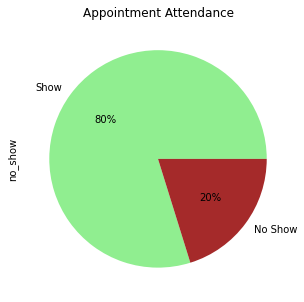

In [31]:
colors = ['lightgreen', 'brown']
labels = 'Show', 'No Show'
df['no_show'].value_counts().plot(kind='pie', 
                                  title= 'Appointment Attendance',
                                  labels=labels,
                                  colors=colors,
                                  autopct='%1.0f%%',
                                  figsize=(5,5));

A list of the named colors was found here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

### 20% of appointments in this Dataset were No-shows

### Visualizing Male to Female Ratio

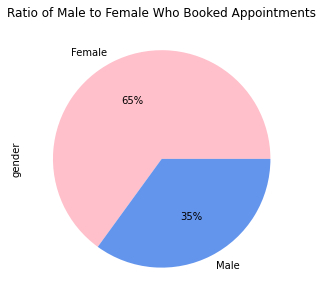

In [32]:
colors = ['pink', 'cornflowerblue']
labels = ['Female', 'Male']
df.gender.value_counts().plot(kind='pie', autopct='%1.0f%%', title='Ratio of Male to Female Who Booked Appointments',
                              labels=labels, colors=colors, figsize=(5,5));

### 65% of patients are Female

### Does gender influence no-show rates?
We know that there are a much greater number of Female appointments, so the proportion should be calculated

Female Proportions = counts for each female no-show / total # female entries

Male Proportions = counts for each male no-show / total # male entries

In [33]:
gender_counts = df.groupby(['gender', 'no_show']).count()['age']
gender_counts

gender  no_show
F       No         57241
        Yes        14591
M       No         30962
        Yes         7725
Name: age, dtype: int64

In [34]:
gender_totals = df.groupby('gender').count()['age']
gender_totals

gender
F    71832
M    38687
Name: age, dtype: int64

In [35]:
female_proportions = gender_counts['F'] / gender_totals['F']
female_proportions

no_show
No     0.796873
Yes    0.203127
Name: age, dtype: float64

In [36]:
male_proportions = gender_counts['M'] / gender_totals['M']
male_proportions

no_show
No     0.800321
Yes    0.199679
Name: age, dtype: float64

### Plotting Gender Proportions

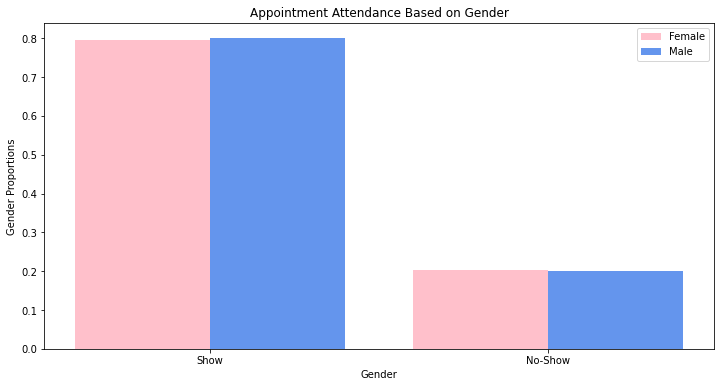

In [37]:
# Creating the figure
ind = np.arange(len(female_proportions)) # the label locations
width = 0.4 # width between the bars
plt.figure(figsize=(12,6))
female_bars = plt.bar(ind, female_proportions, width, color='pink', label='Female')
male_bars = plt.bar(ind + width, male_proportions, width, color='cornflowerblue', label='Male')
plt.ylabel('Gender Proportions')
plt.xlabel('Gender')
plt.title('Appointment Attendance Based on Gender')
locations = ind + width / 2
labels = ['Show', 'No-Show']
plt.xticks(locations,labels)
plt.legend();

### Conclusion: Gender does not influence no-show rates

### Does Age influence no-show rates?

### To better analyze the Age column, the ages should be grouped into ranges.

In [38]:
bins = [0, 20, 35, 50, 65, 80, 115]
labels = ['0-19', '20-34', '35-49', '50-64', '65-79', '80+']

df['agegroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['agegroup'].head()

0    50-64
1    50-64
2    50-64
3     0-19
4    50-64
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

### Confirming the ages fall within the correct Age Group

In [39]:
df[['age', 'agegroup']].head(10)

,age,agegroup
0,62,50-64
1,56,50-64
2,62,50-64
3,8,0-19
4,56,50-64
5,76,65-79
6,23,20-34
7,39,35-49
8,21,20-34
9,19,0-19


In [40]:
df.query('age == 20')['agegroup'].head()

100    20-34
239    20-34
285    20-34
403    20-34
457    20-34
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

In [41]:
df.query('age == 19')['agegroup'].head()

9      0-19
50     0-19
196    0-19
208    0-19
259    0-19
Name: agegroup, dtype: category
Categories (6, object): ['0-19' < '20-34' < '35-49' < '50-64' < '65-79' < '80+']

In [42]:
df.agegroup.value_counts()

0-19     30411
50-64    22634
35-49    21865
20-34    21214
65-79    11039
80+       3356
Name: agegroup, dtype: int64

### Figuring out proportions for each age group

In [43]:
# calculating proportions. This was done differently than the genders
# .size() returns an int representing the number of elements
# size combined with groupby gives us the number of no-shows per neighbourhood

age_noshow = df[df.no_show == 'Yes'].groupby(['agegroup']).size()
age_noshow

agegroup
0-19     6741
20-34    5070
35-49    4490
50-64    3785
65-79    1683
80+       547
dtype: int64

In [44]:
# The same coding is done for totals, except we are including all shows and no shows
age_totals = df.groupby(['agegroup']).size()
age_totals

agegroup
0-19     30411
20-34    21214
35-49    21865
50-64    22634
65-79    11039
80+       3356
dtype: int64

In [45]:
# Now we calculate proportions using favorable / all
age_proportions = age_noshow / age_totals
age_proportions

agegroup
0-19     0.221663
20-34    0.238993
35-49    0.205351
50-64    0.167226
65-79    0.152459
80+      0.162992
dtype: float64

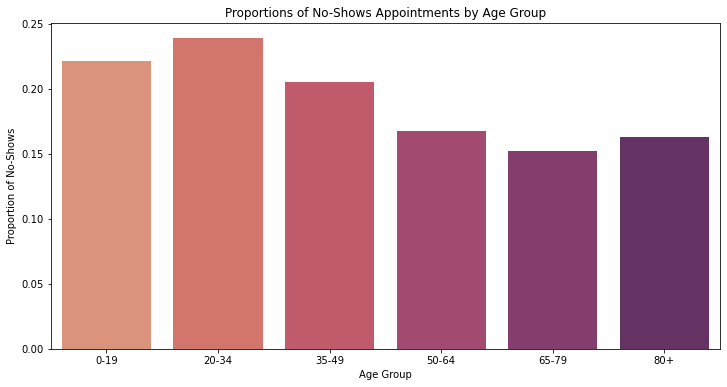

In [46]:
# visualizing our age group findings
plt.figure(figsize=(12,6))
sns.barplot(x=age_proportions.index, y=age_proportions, palette='flare')
plt.title("Proportions of No-Shows Appointments by Age Group")
plt.xlabel('Age Group')
plt.ylabel('Proportion of No-Shows');

Seaborn color palettes can be found here:
https://seaborn.pydata.org/tutorial/color_palettes.html

## Conclusion: Age slightly affects no-show rates. Patients in the age group 20-34 have the highest liklihood at close to 24%, while those in age group 65-79 have the lowest, at 15%.

### Does Neighbourhood influence no-show rates?

In [47]:
# calculating proportions. this was done the same way as age no show rates.

neighbourhood_noshow = df[df.no_show == 'Yes'].groupby(['neighbourhood']).size()
neighbourhood_noshow

neighbourhood
AEROPORTO                1
ANDORINHAS             518
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
                      ... 
SÃO JOSÉ               428
SÃO PEDRO              515
TABUAZEIRO             573
UNIVERSITÁRIO           32
VILA RUBIM             141
Length: 80, dtype: int64

In [48]:
neighbourhood_total = df.groupby(['neighbourhood']).size()
neighbourhood_total

neighbourhood
AEROPORTO                 8
ANDORINHAS             2258
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1976
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Length: 81, dtype: int64

In [49]:
# favorable / all
neighbourhood_ratio = neighbourhood_noshow / neighbourhood_total
neighbourhood_ratio

neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.229407
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
                         ...   
SÃO JOSÉ               0.216599
SÃO PEDRO              0.210376
TABUAZEIRO             0.182950
UNIVERSITÁRIO          0.210526
VILA RUBIM             0.165687
Length: 81, dtype: float64

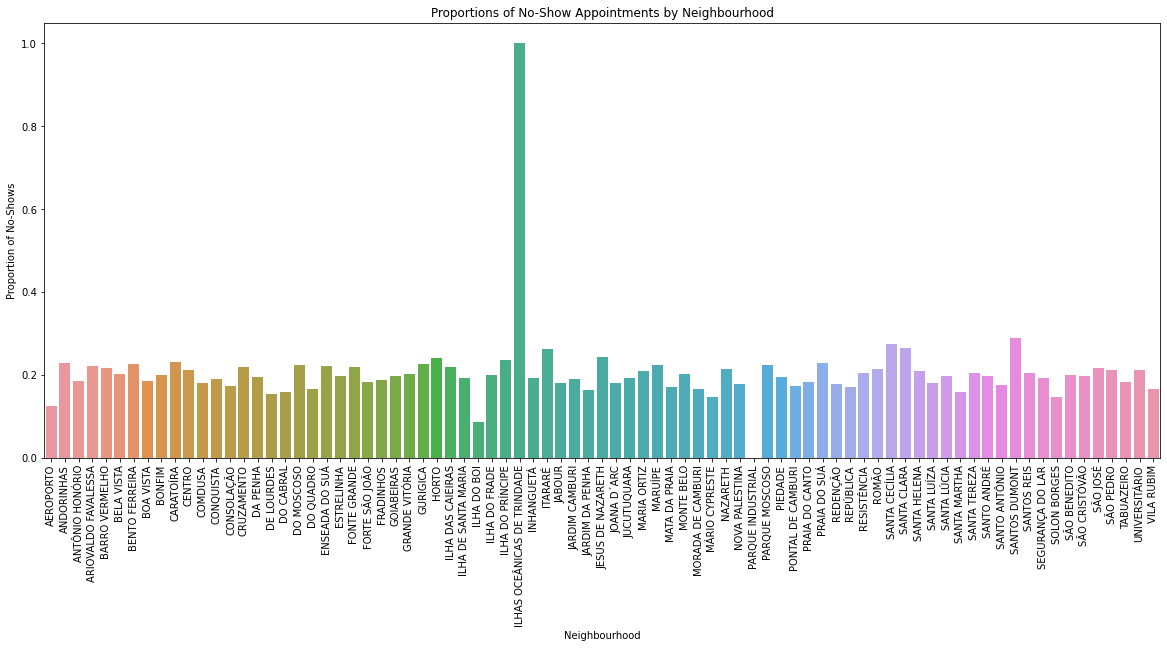

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(x=neighbourhood_ratio.index, y=neighbourhood_ratio)
plt.title("Proportions of No-Show Appointments by Neighbourhood")
plt.ylabel('Proportion of No-Shows')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)
plt.show()

## Conclusion: Neighbourhood does not affect no-show rates, with most being around 20% except for Ilhas Oceanicas De Trindade, which has 100%!

## Are no-show rates affected by those patients on the Brazilian welfare program?

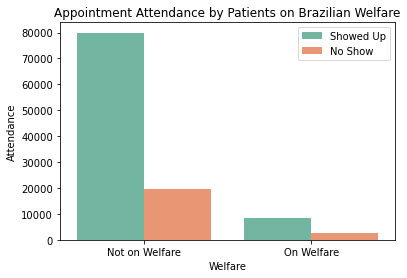

In [51]:
ax = sns.countplot(x='scholarship', hue='no_show', data=df, palette='Set2')
ax.set(xlabel='Welfare', 
       ylabel='Attendance', 
       title='Appointment Attendance by Patients on Brazilian Welfare',
       xticklabels=['Not on Welfare', 'On Welfare'])
plt.legend(['Showed Up', 'No Show']);

Although this visualization is interesting, the show rates really overshadow the no-show rates. And when we come back to our main question of "What factors increase the likliehood of a no-show', our focus should be on **no-shows** and what factors contribute to the liklihood of a patient no-showing. Therefore, we will conduct further analysis on the dfnoshow dataframe, as this only contain rows where patients no-showed.

In [52]:
scholarship_counts = dfnoshow.scholarship.value_counts()
scholarship_counts # Getting the counts of all who have and dont have scholarships and no-showed.

0    19738
1     2578
Name: scholarship, dtype: int64

In [53]:
noshow_totals = dfnoshow.no_show.count() 
noshow_totals

22316

In [54]:
ratio_scholarship_noshow = scholarship_counts / noshow_totals
ratio_scholarship_noshow

0    0.884478
1    0.115522
Name: scholarship, dtype: float64

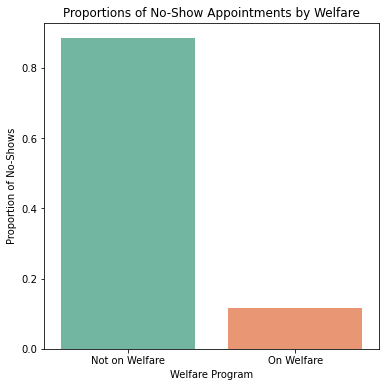

In [177]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=ratio_scholarship_noshow.index, y=ratio_scholarship_noshow, palette='Set2')
ax.set(title="Proportions of No-Show Appointments by Welfare",
       ylabel='Proportion of No-Shows',
       xlabel='Welfare Program',
       xticklabels=['Not on Welfare', 'On Welfare']);

Out of the patients that no-showed, 11% of them were on the Welfare Program.

In [56]:
df_totals = df.no_show.count()

scholarship_percent_all = scholarship_counts / df_totals
scholarship_percent_all

0    0.178594
1    0.023326
Name: scholarship, dtype: float64

Across all appointments, 2.3% were welfare patients that no-showed

## Conclusion: Patients on the Brazilian Welfare Program are much less likely to no-show than those not on the program. 

## Do any medical impairments affect no shows?

In [110]:
hypertension_counts = dfnoshow.hypertension.value_counts()
diabetes_counts = dfnoshow.diabetes.value_counts()
alcoholism_counts = dfnoshow.alcoholism.value_counts()
hypertension_counts

0    18544
1     3772
Name: hypertension, dtype: int64

In [184]:
hypertension_sum = dfnoshow.hypertension.sum()
hypertension_sum

3772

In [200]:
diabetes_counts

0    20886
1     1430
Name: diabetes, dtype: int64

In [186]:
hypertension_sum_ratio = hypertension_sum / noshow_totals
hypertension_sum_ratio

0.16902670729521418

In [187]:
diabetes_sum = dfnoshow.diabetes.sum()
diabetes_sum

1430

In [193]:
diabetes_sum_ratio = diabetes_sum / noshow_totals
diabetes_sum_ratio

0.06407958415486646

In [199]:
alcoholism_sum = dfnoshow.alcoholism.sum()
alcoholism_sum

677

In [194]:
alcoholism_sum_ratio = alcoholism_sum / noshow_totals
alcoholism_sum_ratio

0.030336977953038177

In [196]:
noshow_condition_ratios = [hypertension_sum_ratio, diabetes_sum_ratio, alcoholism_sum_ratio]
noshow_condition_ratios

[0.16902670729521418, 0.06407958415486646, 0.030336977953038177]

<AxesSubplot:>

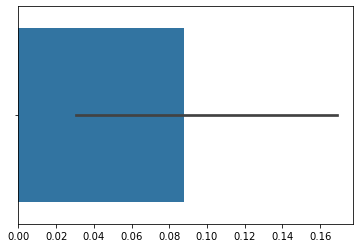

In [202]:
sns.barplot(x=noshow_condition_ratios)

In [173]:
noshow_conditions = dfnoshow[(dfnoshow['hypertension']== 1) & (dfnoshow['diabetes'] == 1) & (dfnoshow['alcoholism'] == 1)]

In [172]:
noshow_conditions = dfnoshow[['hypertension', 'diabetes', 'alcoholism']]

In [117]:
noshow_hypertension_ratio = hypertension_counts / noshow_totals
noshow_diabetes_ratio = diabetes_counts / noshow_totals
noshow_alcoholism_ratio = alcoholism_counts / noshow_totals
noshow_hypertension_ratio

0    0.830973
1    0.169027
Name: hypertension, dtype: float64

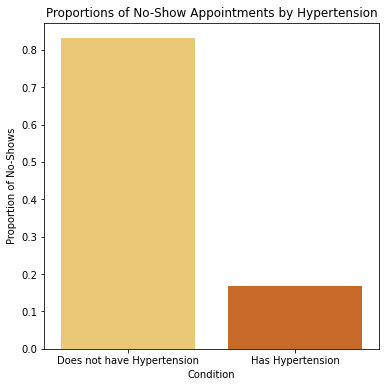

In [176]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=ratio_scholarship_noshow.index, y=noshow_hypertension_ratio, palette='YlOrBr')
# plt.subplot(x=noshow_diabetes_ratio.index, y=noshow_diabetes_ratio)
ax.set(title="Proportions of No-Show Appointments by Hypertension",
       ylabel='Proportion of No-Shows',
       xlabel='Condition',
       xticklabels=['Does not have Hypertension', 'Has Hypertension']);

In [175]:
noshow_diabetes_ratio

0    0.93592
1    0.06408
Name: diabetes, dtype: float64

In [68]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=ratio_scholarship_noshow.index, y=noshow_hypertension_ratio, palette='YlOrBr')
# plt.subplot(x=noshow_diabetes_ratio.index, y=noshow_diabetes_ratio)
ax.set(title="Proportions of No-Show Appointments by Hypertension",
       ylabel='Proportion of No-Shows',
       xlabel='Condition',
       xticklabels=['Does not have Hypertension', 'Has Hypertension']);

In [70]:
noshow_alcoholism_ratio

In [142]:
noshow_conditions

[0.034129878120504165, 0.01293895167346791, 0.006125643554501941]

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

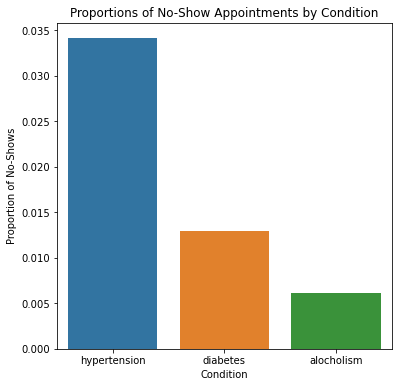